# EDA
- Fuel Consumption : 100km에 소비하는 양
- Fuel Consumption Comb : City/Hwy = 55/45 비율로 섞음
- mpg * 0.425 = KM/L (연비)
- 의문
    1. 여러 변수와 co2 배출량 사이의 관계
    2. co2 배출에 가장 큰 영향을 끼치는 변수
    3. city와 hwy에 따라 배출량이 다를까

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/CO2 Emissions_Canada.csv')
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Fuel Consumption Comb calculated?

In [6]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
v1 = data['Fuel Consumption City (L/100 km)']
v2 = data['Fuel Consumption Hwy (L/100 km)']
v3 = data['Fuel Consumption Comb (L/100 km)']
A = np.column_stack([v1, v2])
x = np.linalg.lstsq(A, v3, rcond=-1)
print(x[0])

[0.54977202 0.45035134]


In [27]:
## 오브젝트 타입 확인
data.describe(include=['O'])

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


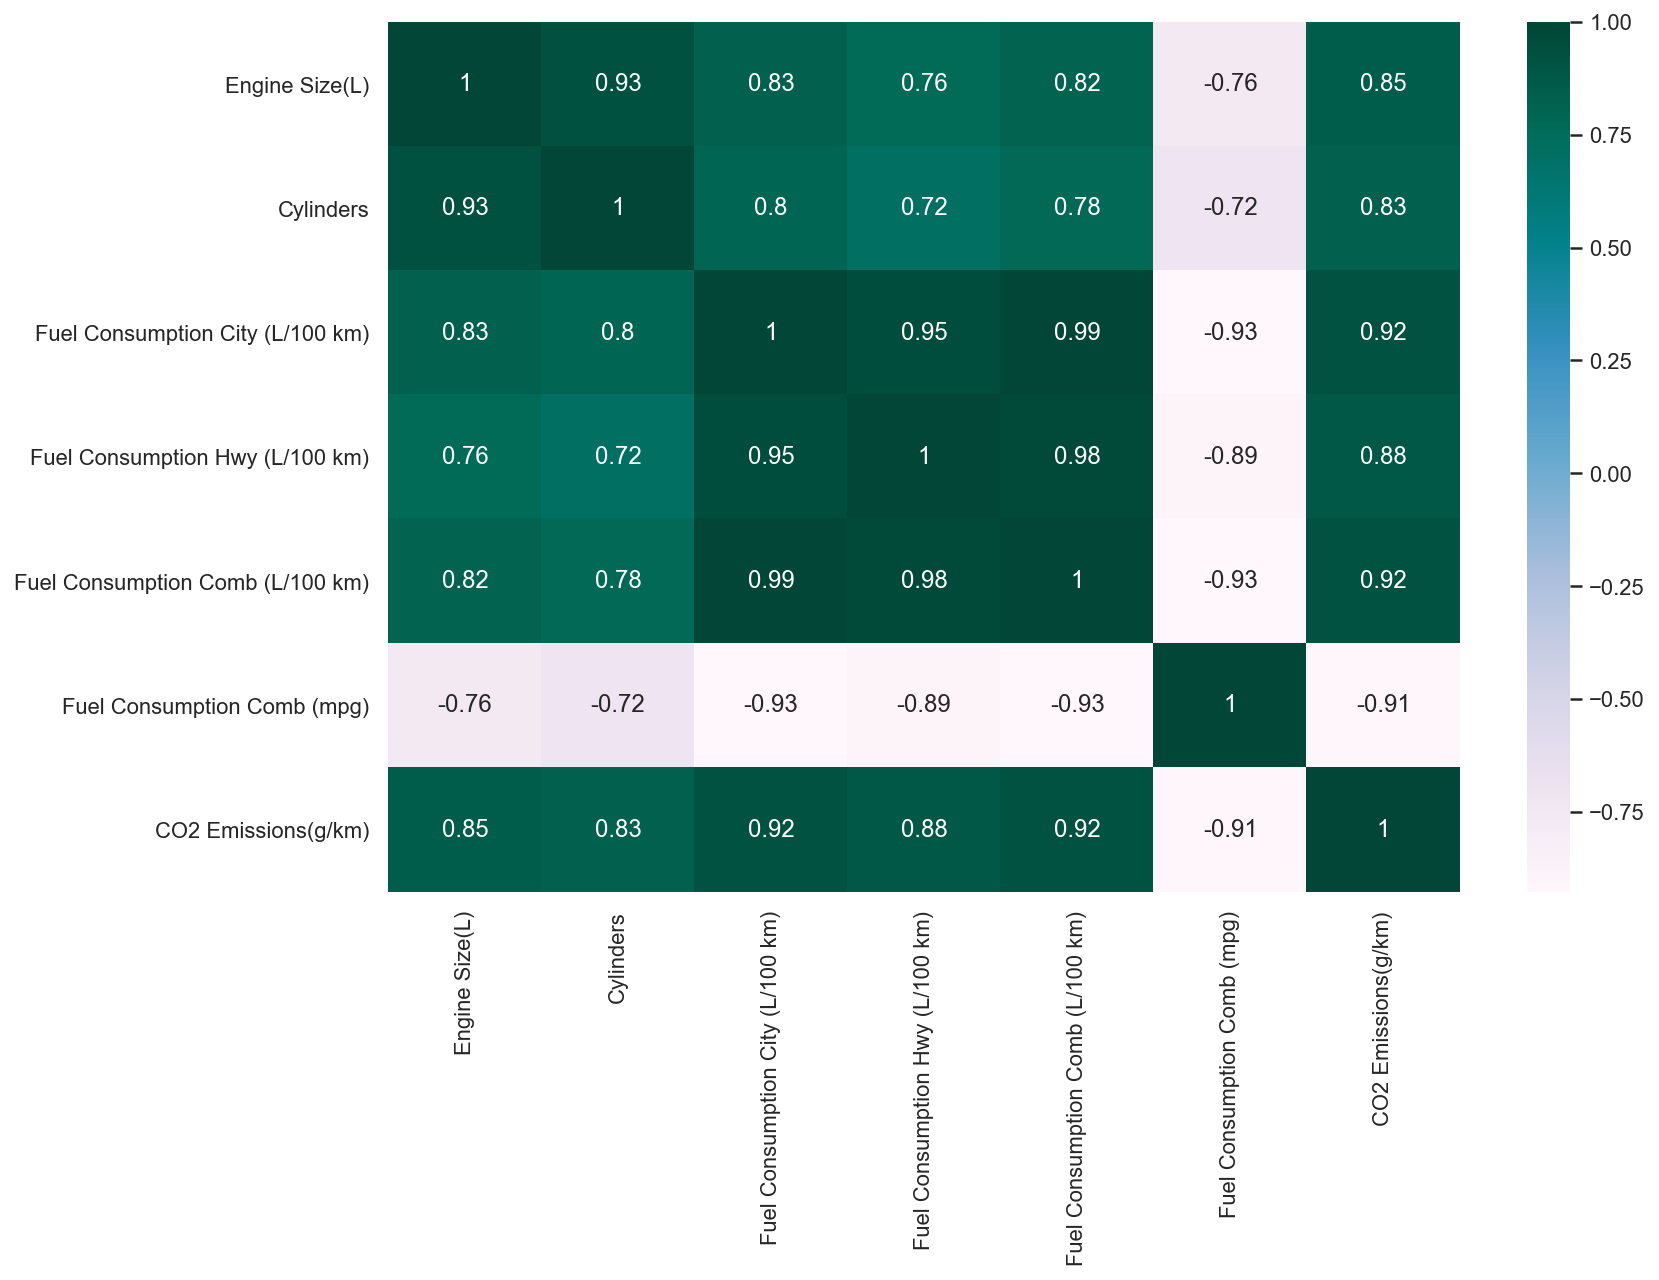

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="PuBuGn", annot=True);

In [11]:
feature

Index(['Make', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x432 with 0 Axes>

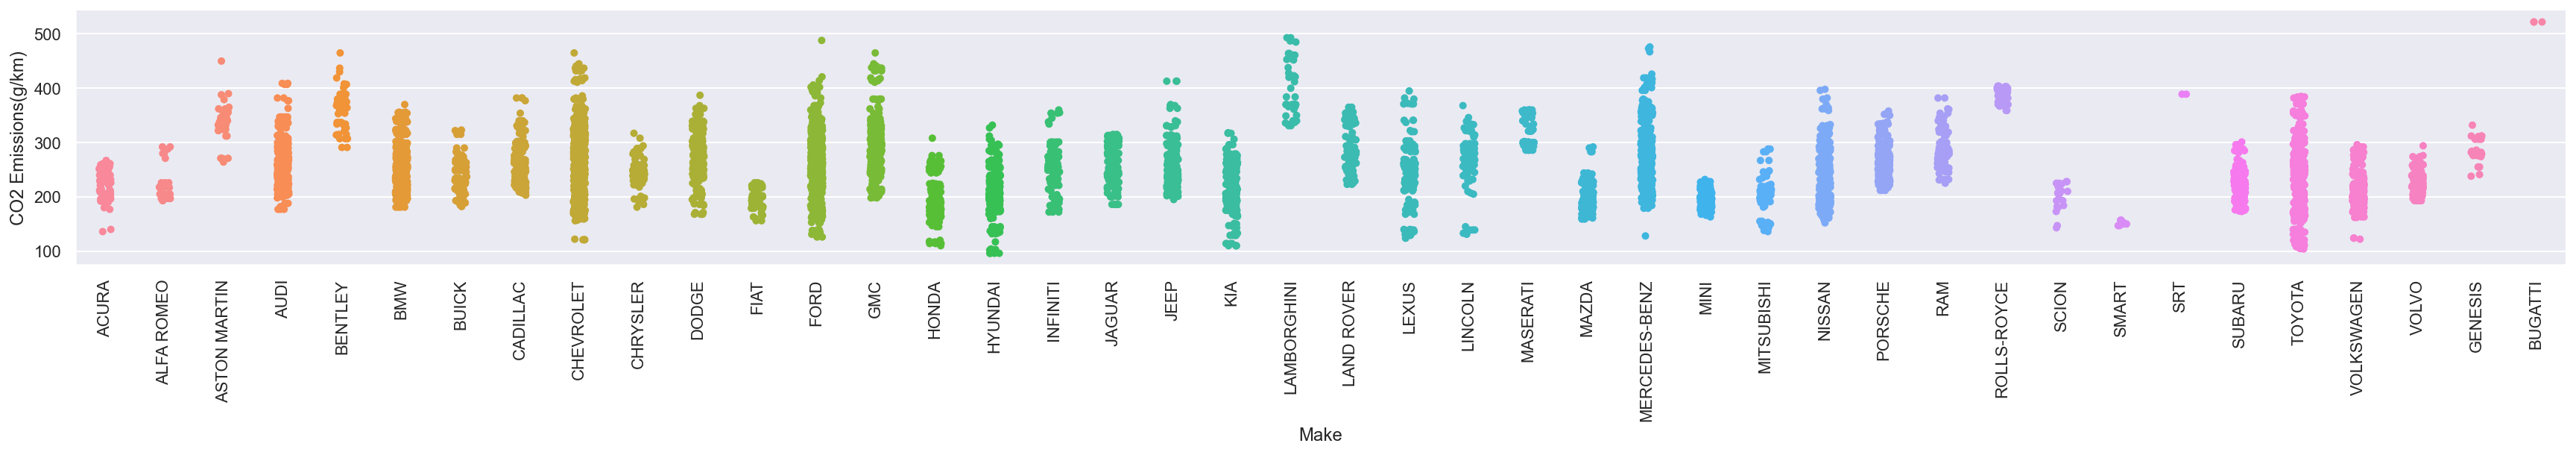

In [230]:
cat_data = data.select_dtypes(exclude=['float64', 'int64'])
cols = cat_data.columns
cols = cols.drop('Model')
plt.figure(figsize=(16,6))
sns.catplot(x='Make', y='CO2 Emissions(g/km)', data=data, size=3, aspect=8)
plt.xticks(rotation=90);

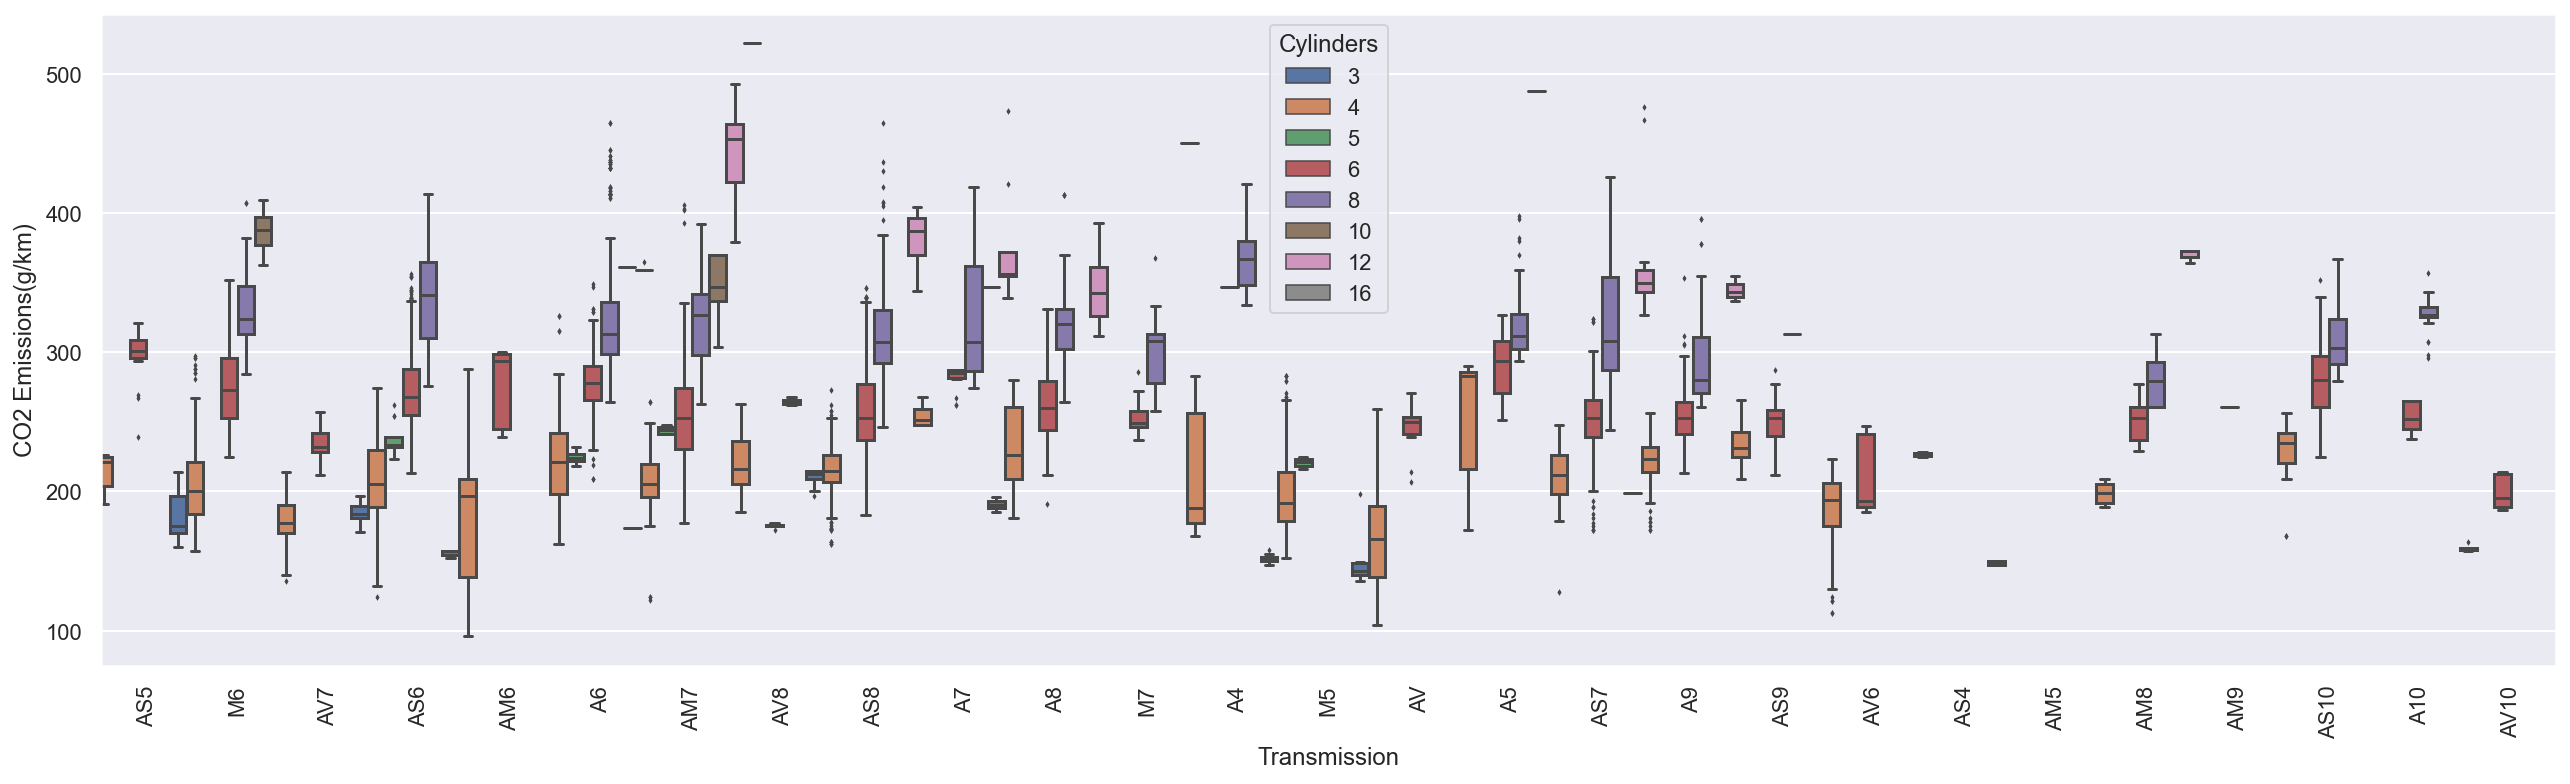

In [68]:
plt.figure(figsize=(22,6))
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', hue='Cylinders', data=data, fliersize=1, width=1.5)
plt.xticks(rotation=90);

In [70]:
data['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [78]:
data.loc[data['Transmission'].isin(['AS5','AS6','AS8','AS7','AS9','AS4','AS10']), 'TM_kind'] = 'AS'
data.loc[data['Transmission'].isin(['M6','M7','M5']), 'TM_kind'] = 'M'
data.loc[data['Transmission'].isin(['AV7','AV8','AV','AV6','AV10']), 'TM_kind'] = 'AV'
data.loc[data['Transmission'].isin(['AM6','AM7','AM5','AM8','AM9']), 'TM_kind'] = 'AM'
data.loc[data['Transmission'].isin(['A6','A7','A8','A4','A5','A9','A10']), 'TM_kind'] = 'A'

In [79]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'TM_kind'],
      dtype='object')

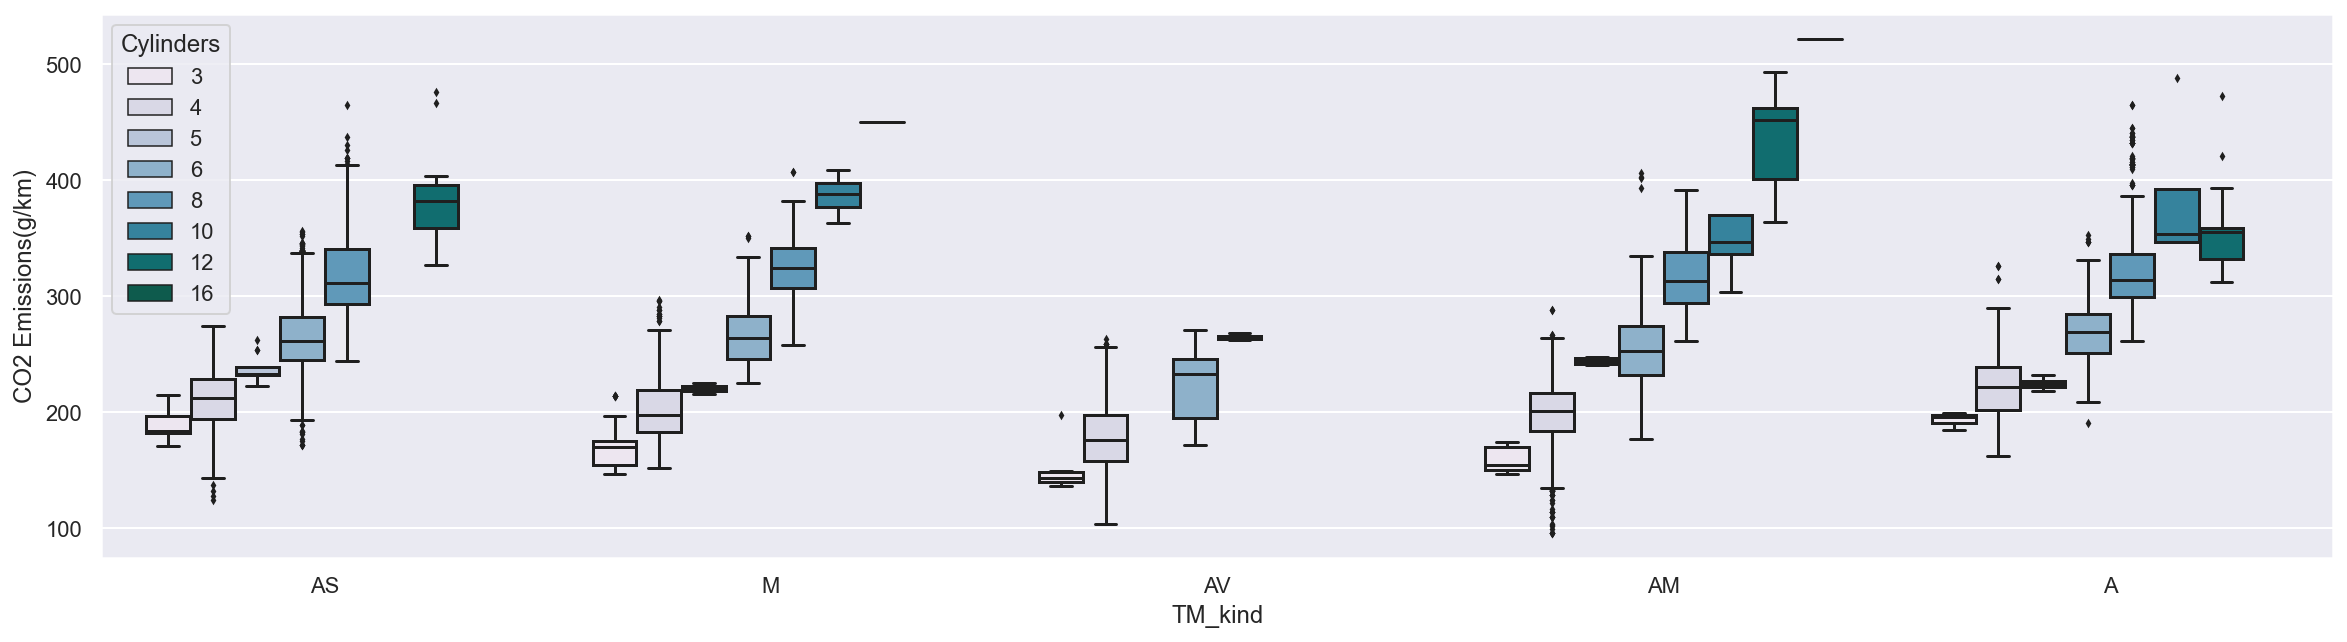

In [254]:
plt.figure(figsize=(20,5))
sns.boxplot(x='TM_kind', y='CO2 Emissions(g/km)', hue='Cylinders', data=data, fliersize=2, width=0.8, palette='PuBuGn');

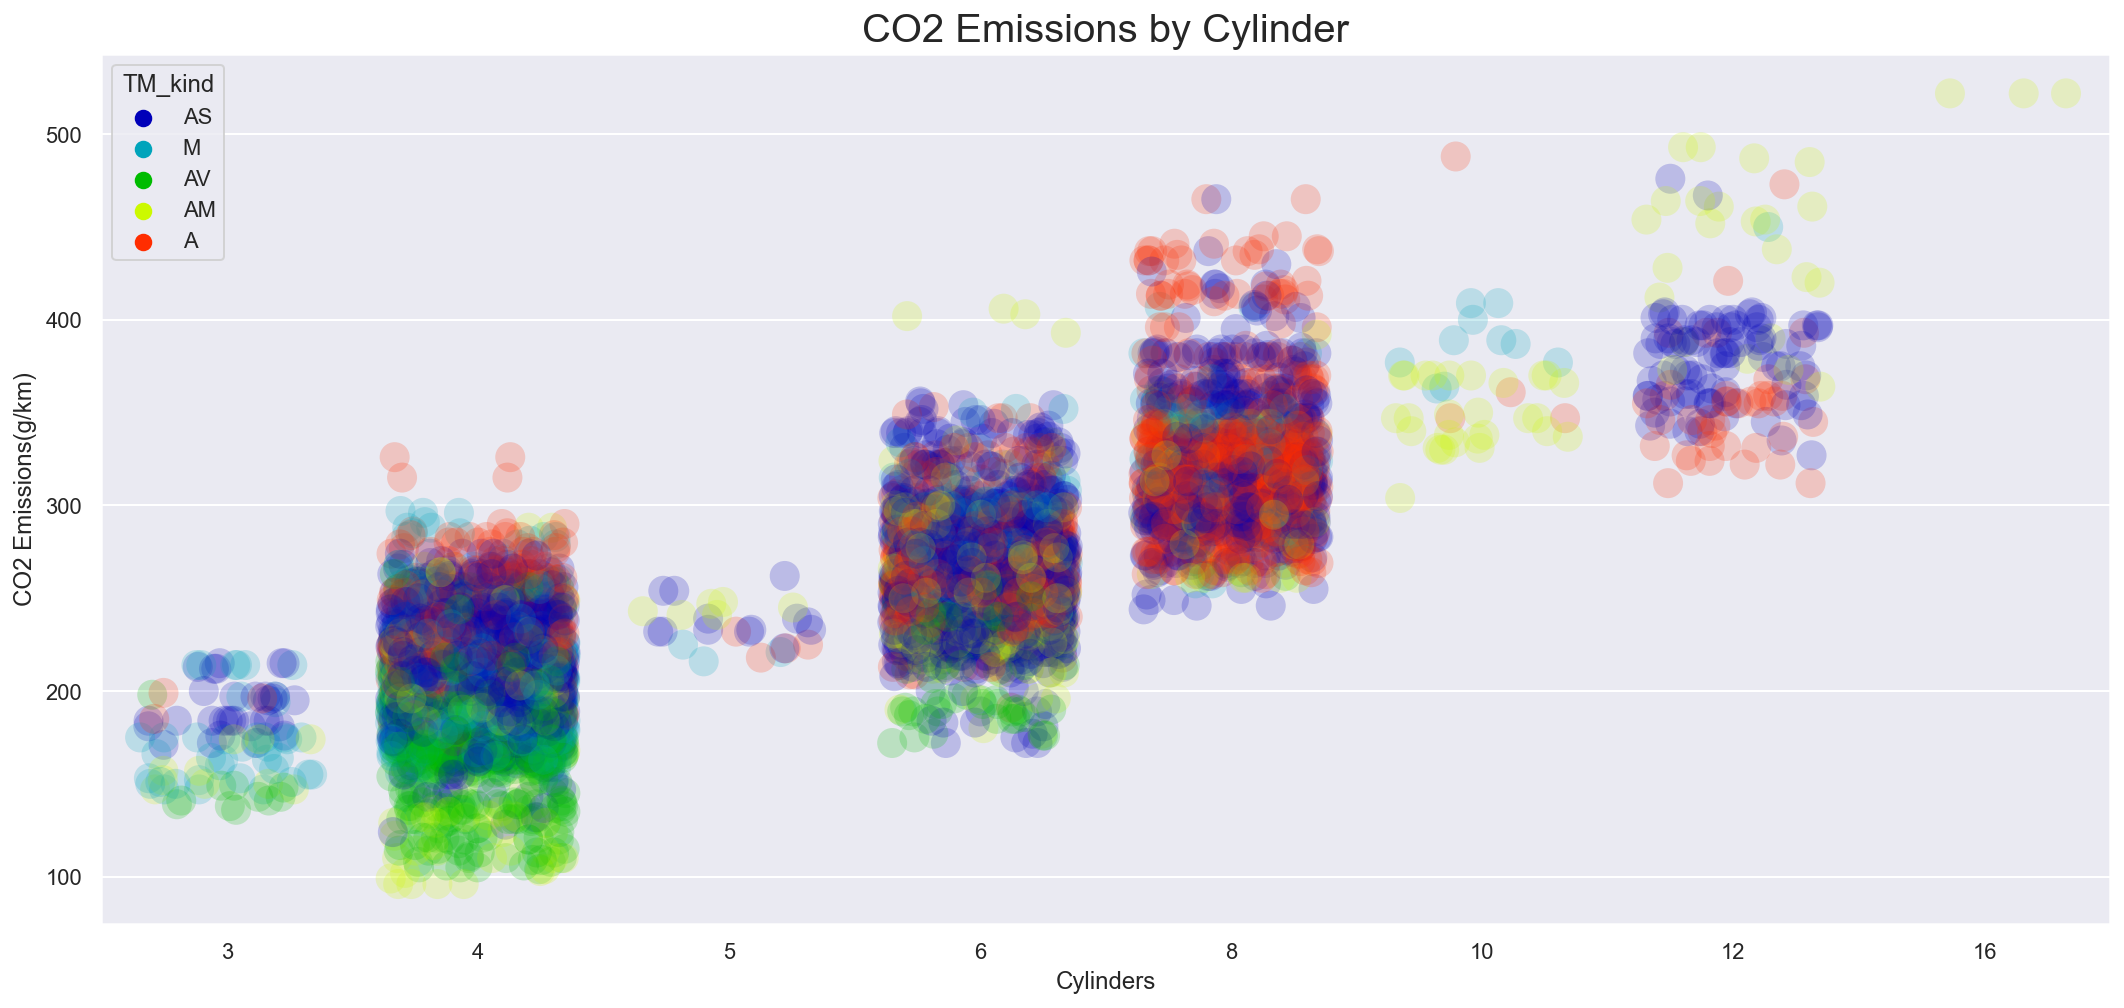

In [268]:
plt.figure(figsize=(18,8))
sns.stripplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data, hue='TM_kind',palette='nipy_spectral',size=15, alpha=.2, jitter=0.35)
plt.title('CO2 Emissions by Cylinder', fontdict={'fontsize':20});

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

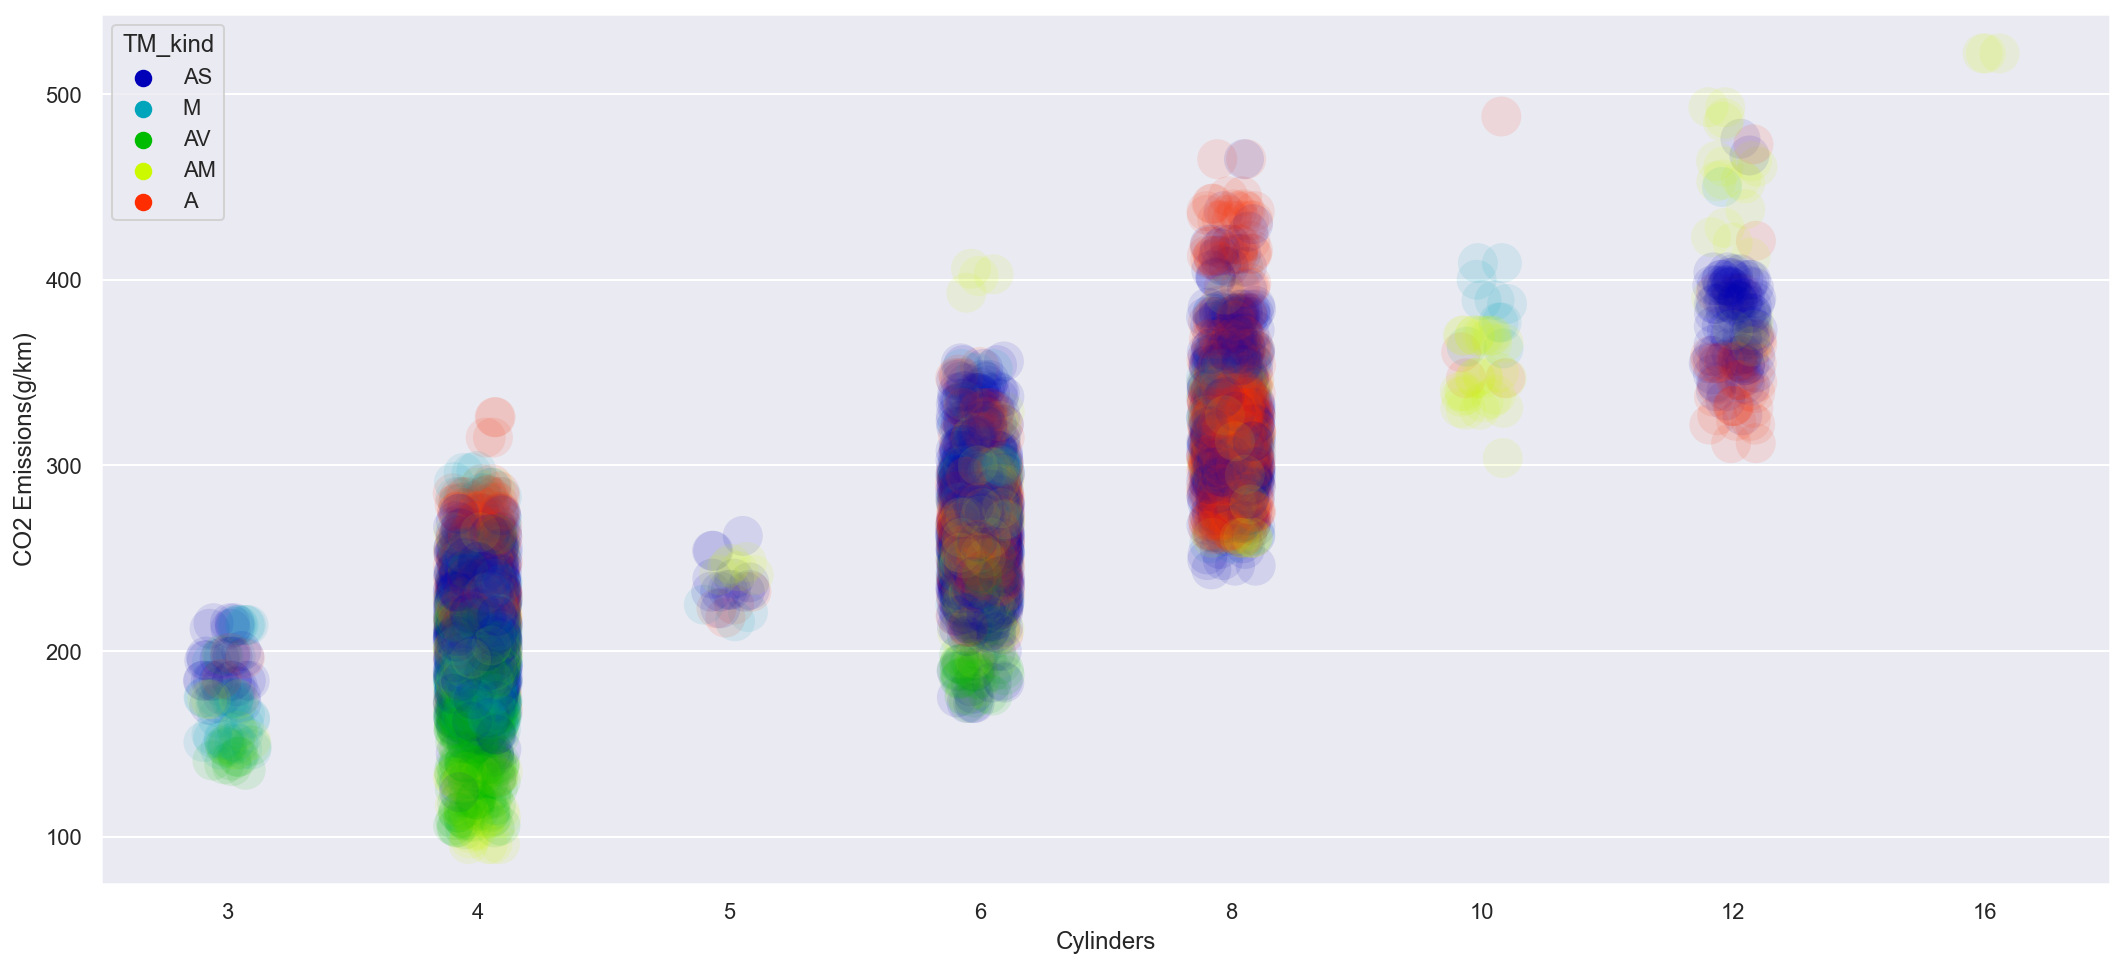

In [240]:
plt.figure(figsize=(18,8))
sns.stripplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data, hue='TM_kind',palette='nipy_spectral',size=20, alpha=.1, norm=[0.1])

<AxesSubplot:xlabel='Cylinders', ylabel='Engine Size(L)'>

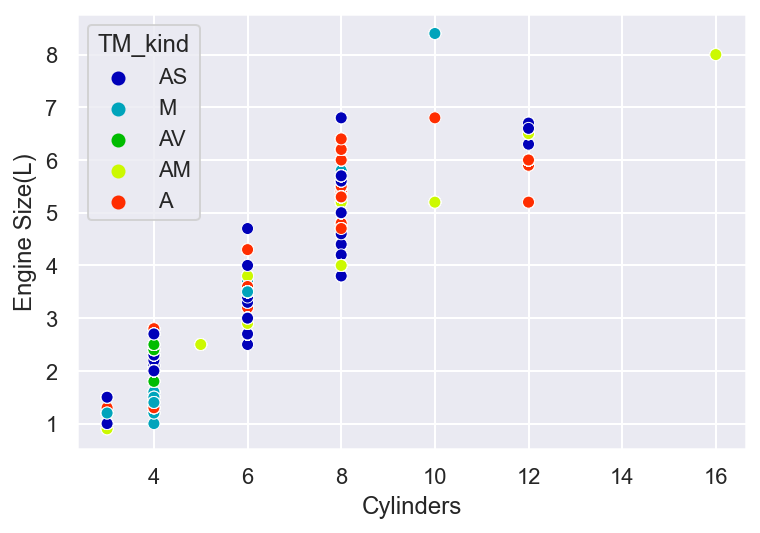

In [264]:
sns.scatterplot(y='Engine Size(L)', x='Cylinders', hue='TM_kind', palette='nipy_spectral', data=data)

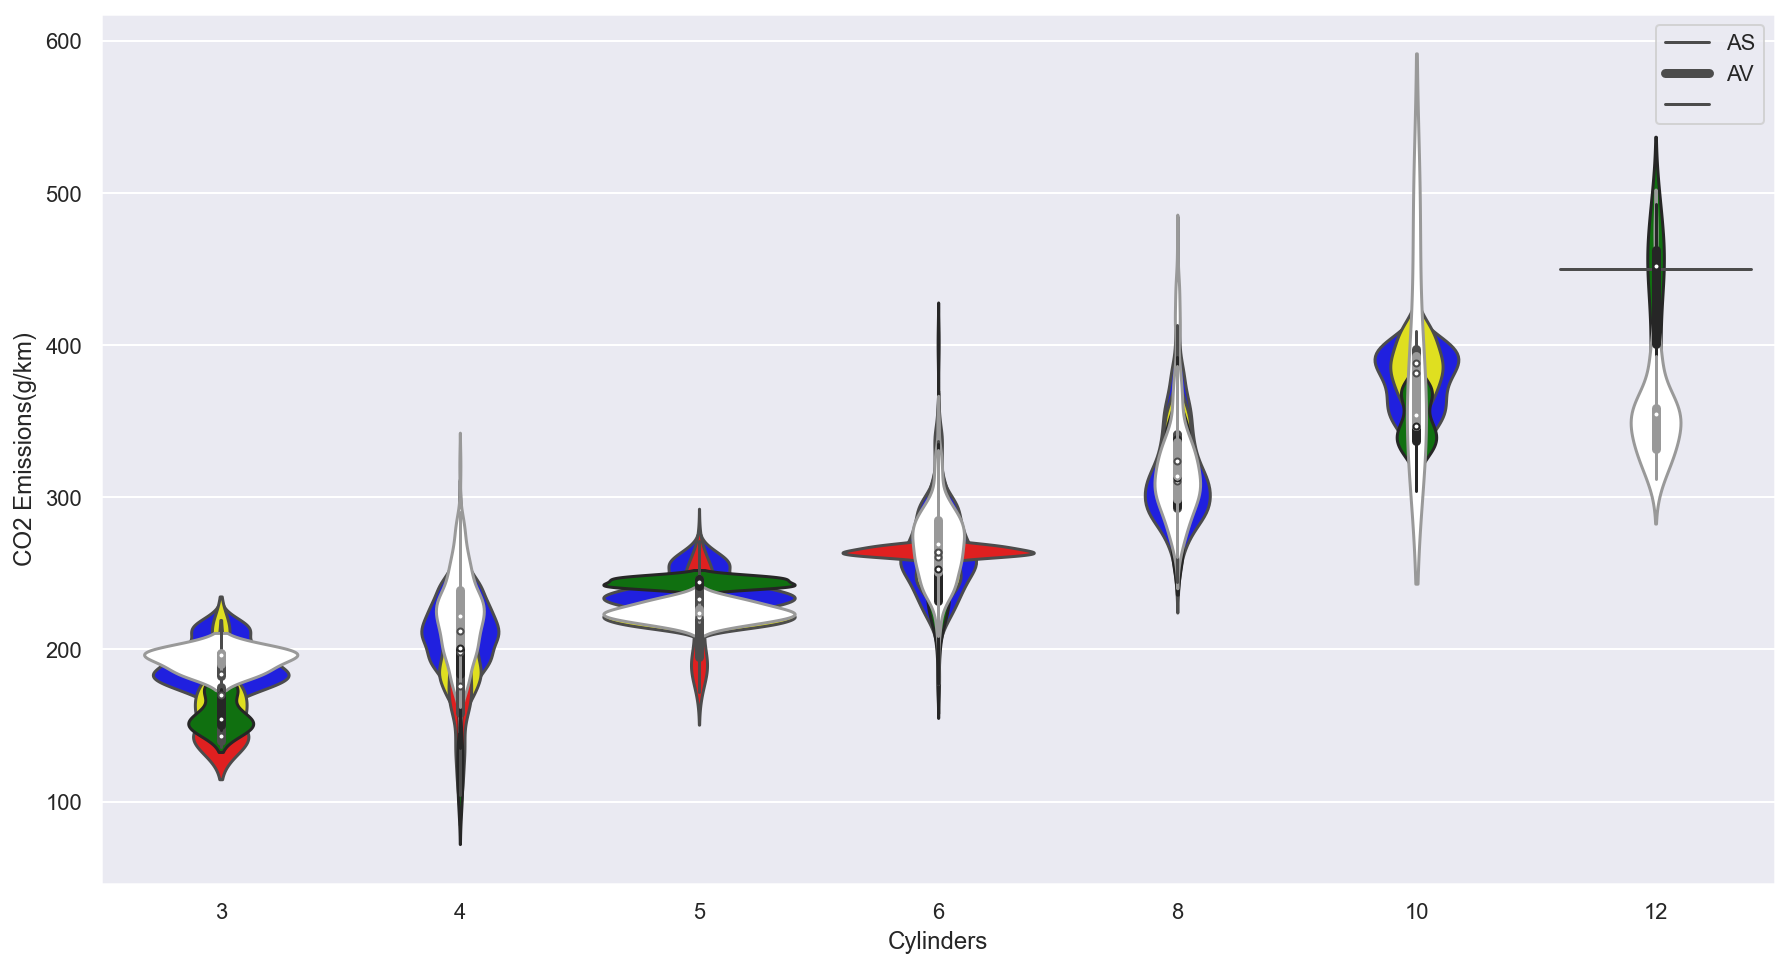

In [170]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data[data['TM_kind'] == 'AS'], color='blue',size=1, alpha=.1)
ax = sns.violinplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data[data['TM_kind'] == 'M'], color='yellow',size=1, alpha=0.1)
ax = sns.violinplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data[data['TM_kind'] == 'AV'], color='red',size=1, alpha=0.1)
ax = sns.violinplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data[data['TM_kind'] == 'AM'], color='green',size=1, alpha=0.1)
ax = sns.violinplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data[data['TM_kind'] == 'A'], color='white',size=1, alpha=0.1)
ax.legend(["AS", "AV",'']);

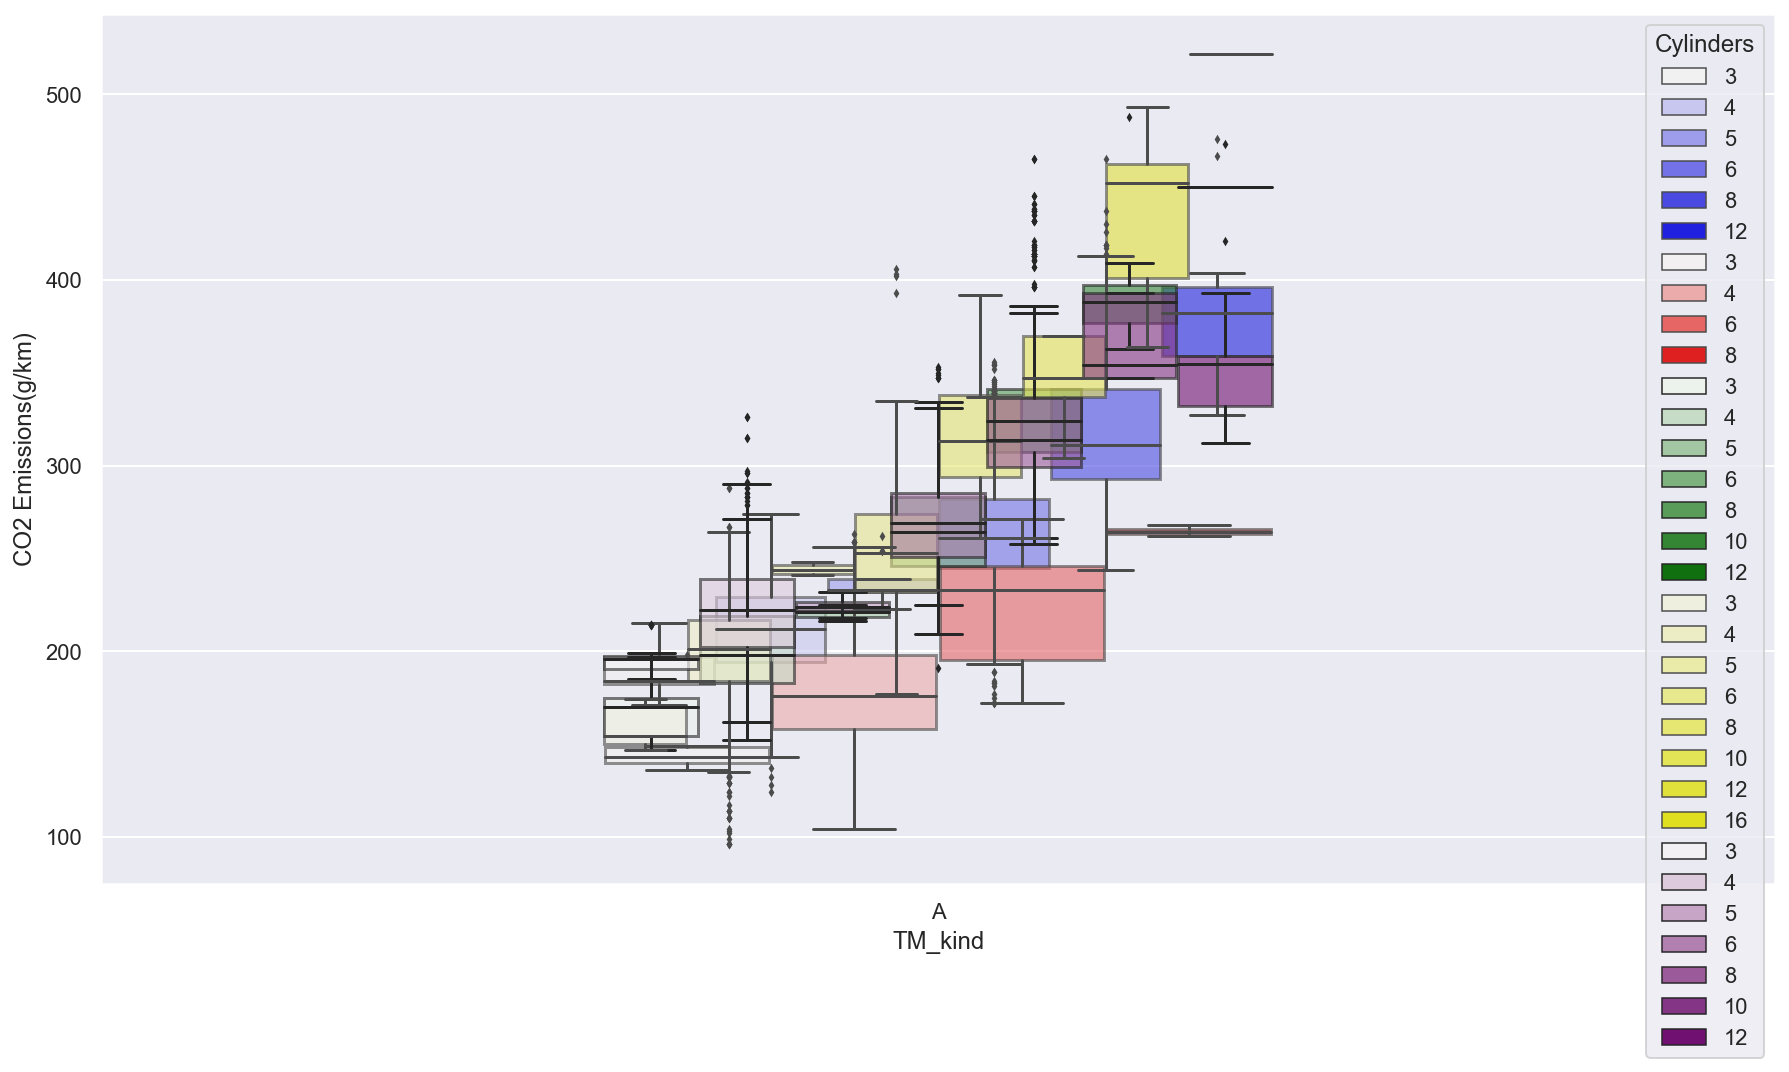

In [252]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='TM_kind', y='CO2 Emissions(g/km)', hue='Cylinders', data=data[data['TM_kind'] == 'AS'], fliersize=2, width=0.4, color='blue', boxprops=dict(alpha=.6))
ax = sns.boxplot(x='TM_kind', y='CO2 Emissions(g/km)', hue='Cylinders', data=data[data['TM_kind'] == 'AV'], fliersize=2, width=0.4, color='red', boxprops=dict(alpha=.6))
ax = sns.boxplot(x='TM_kind', y='CO2 Emissions(g/km)', hue='Cylinders', data=data[data['TM_kind'] == 'M'], fliersize=2, width=0.4, color='green', boxprops=dict(alpha=.6))
ax = sns.boxplot(x='TM_kind', y='CO2 Emissions(g/km)', hue='Cylinders', data=data[data['TM_kind'] == 'AM'], fliersize=2, width=0.4, color='yellow', boxprops=dict(alpha=.6))
ax = sns.boxplot(x='TM_kind', y='CO2 Emissions(g/km)', hue='Cylinders', data=data[data['TM_kind'] == 'A'], fliersize=2, width=0.4, color='purple', boxprops=dict(alpha=.6))
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles, ["AS", "AV",''])
# plt.xticks(rotation=90);

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

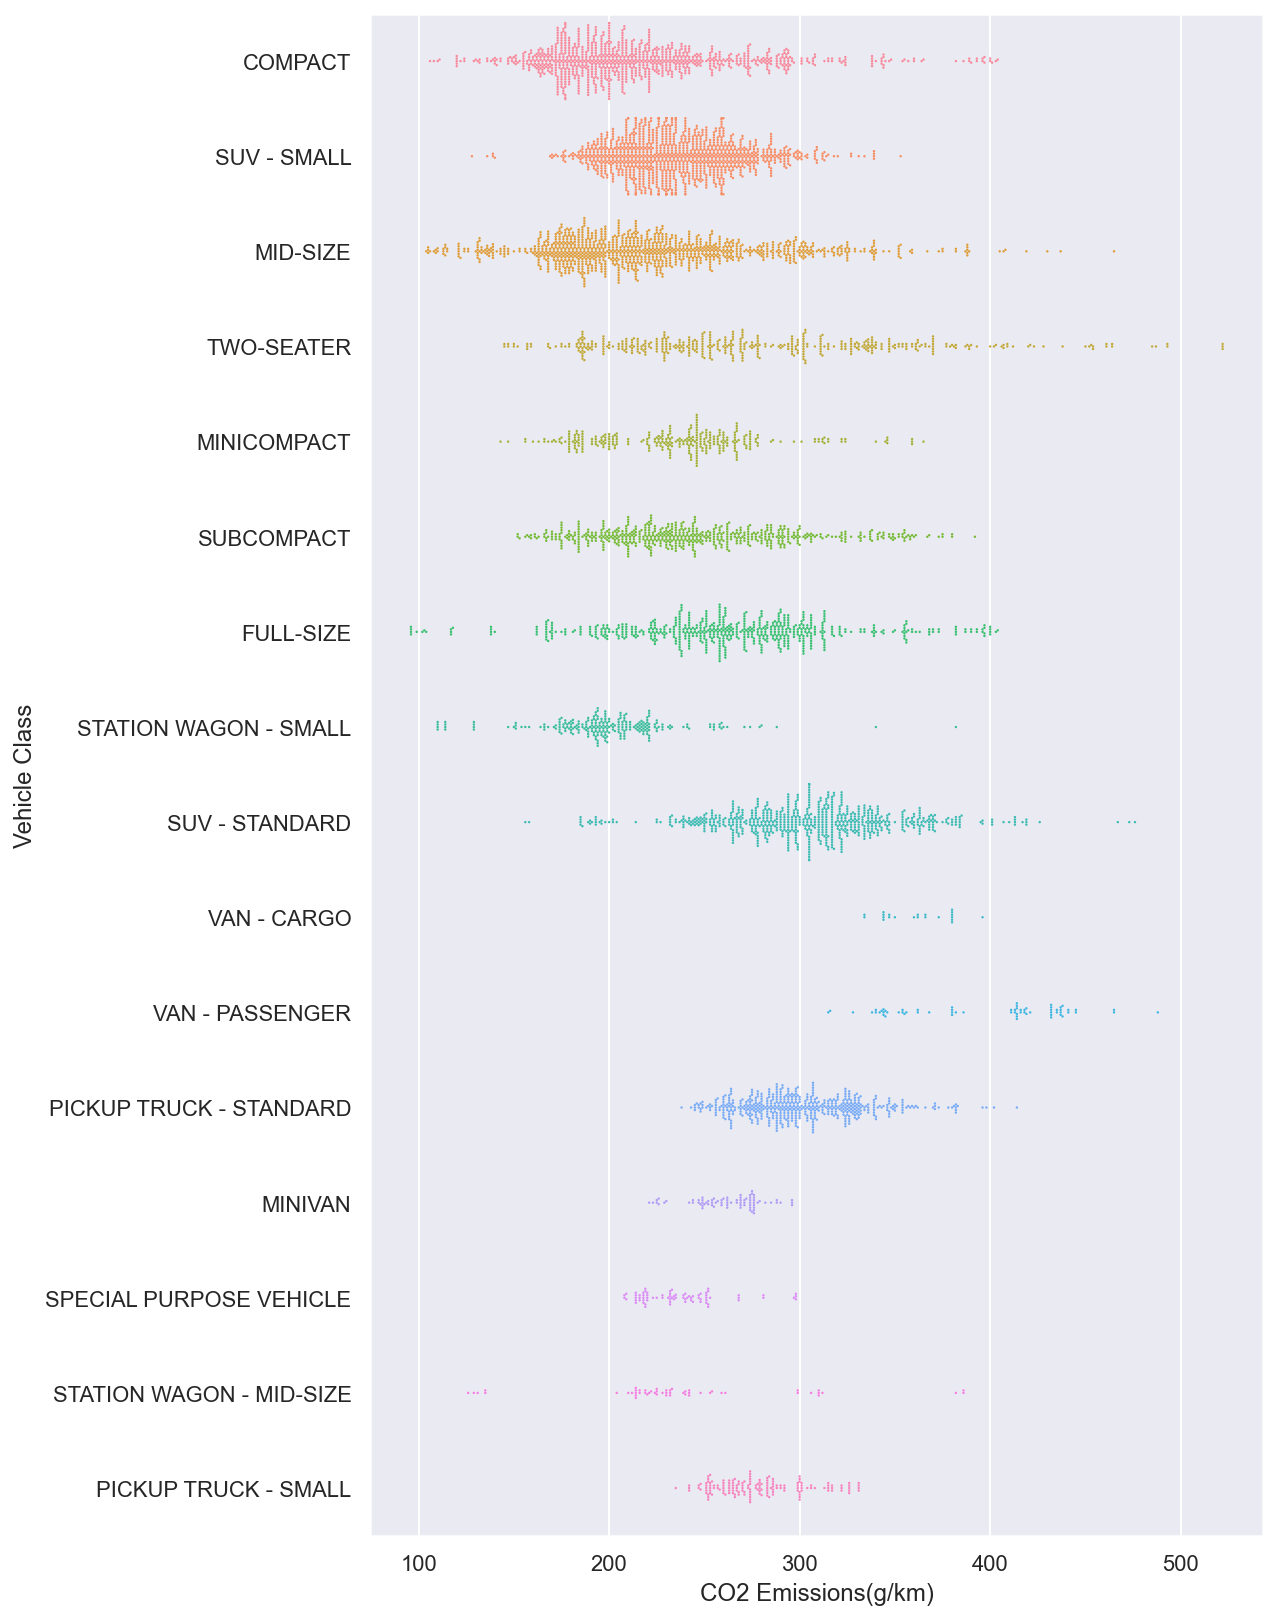

In [34]:
plt.figure(figsize=(8,14))
sns.swarmplot(y='Vehicle Class', x='CO2 Emissions(g/km)', data=data, size=1.2)

In [ ]:
for feature in col:
    sns.catplot(kind='swarm', x=feature, y='CO2 Emissions(g/km)', data=data, aspect=5)

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

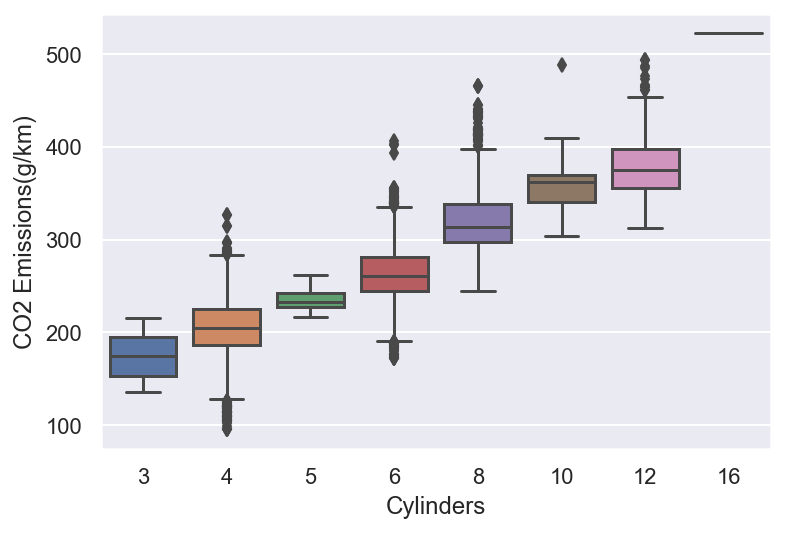

In [33]:
sns.boxplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data)

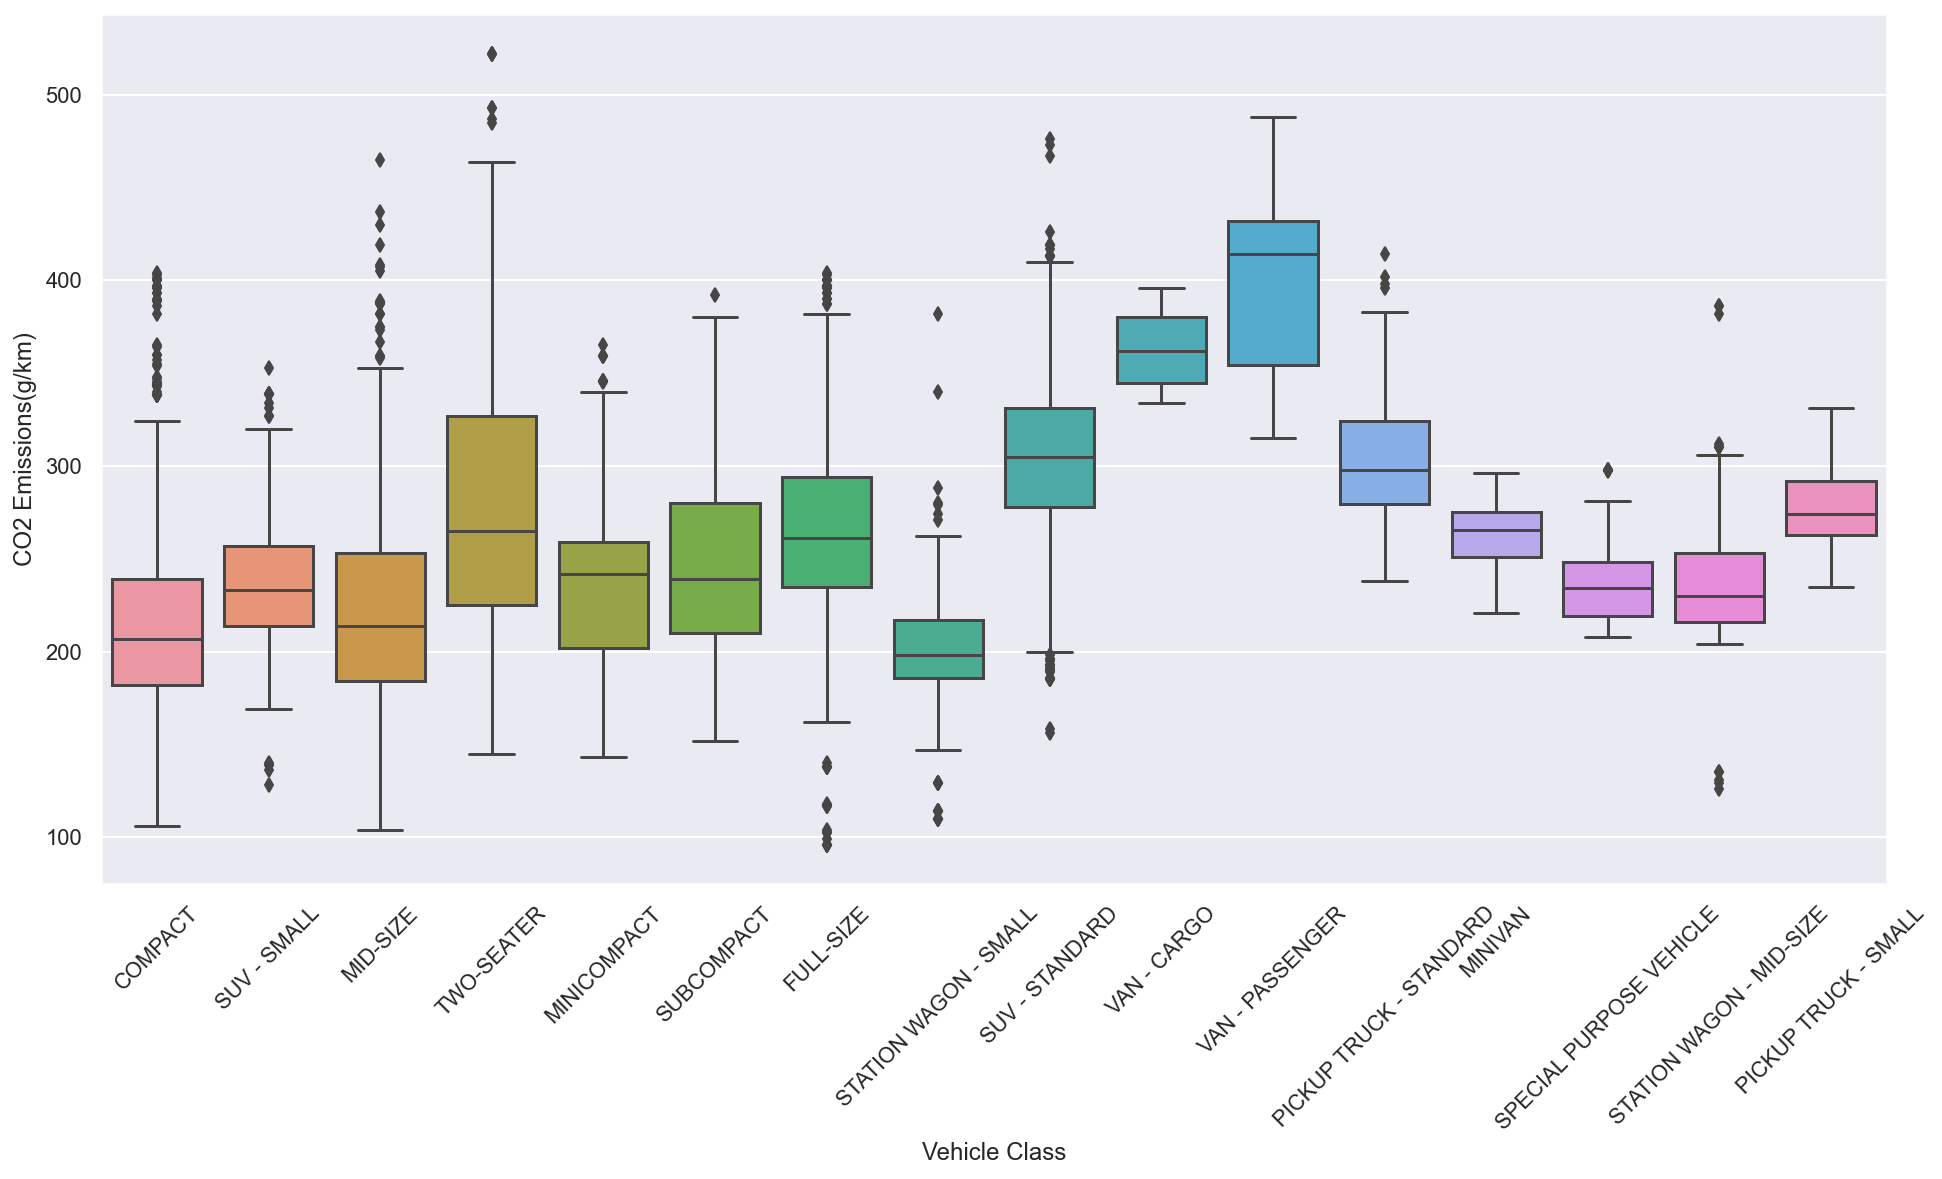

In [43]:
plt.figure(figsize=(16,8))
g = sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45);

## num data

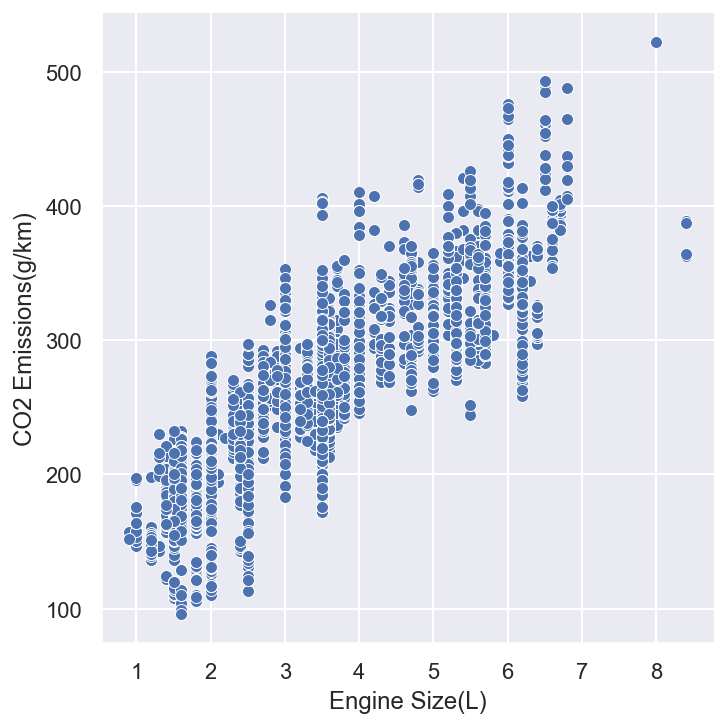

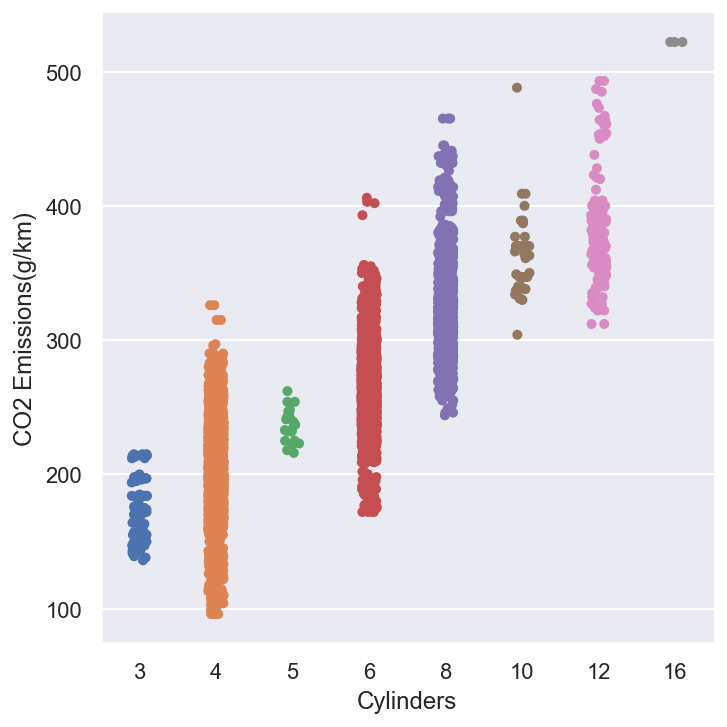

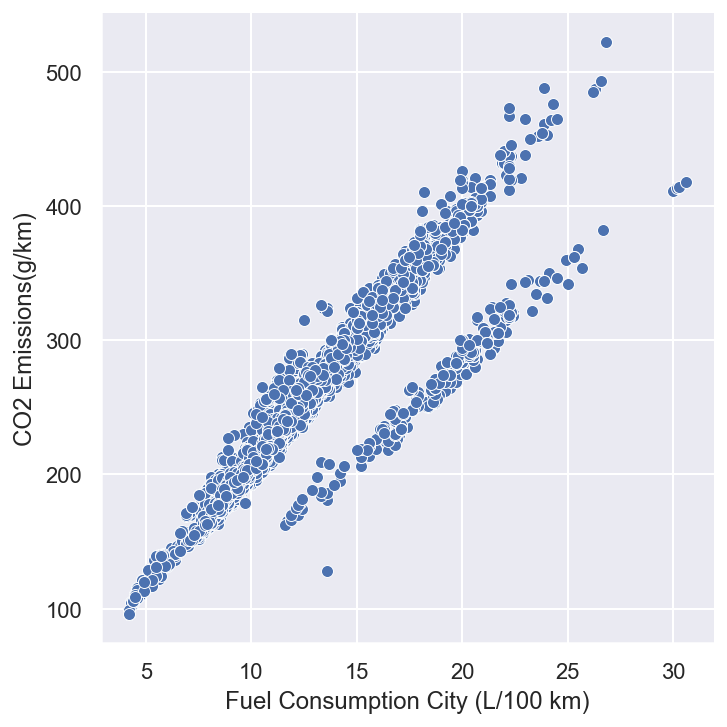

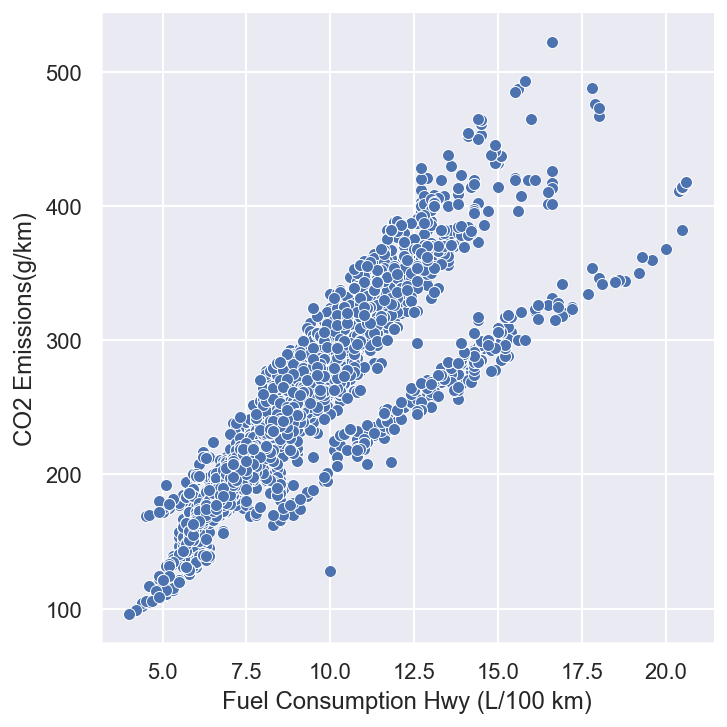

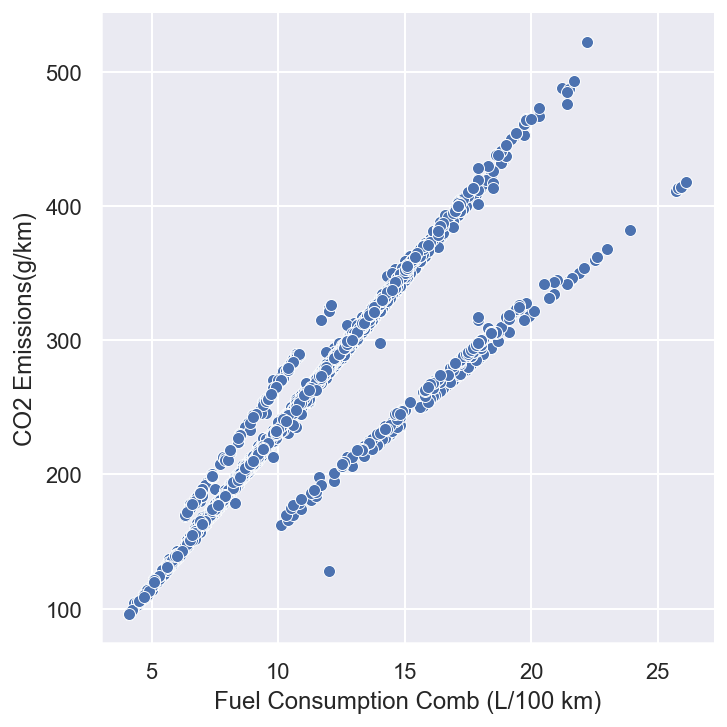

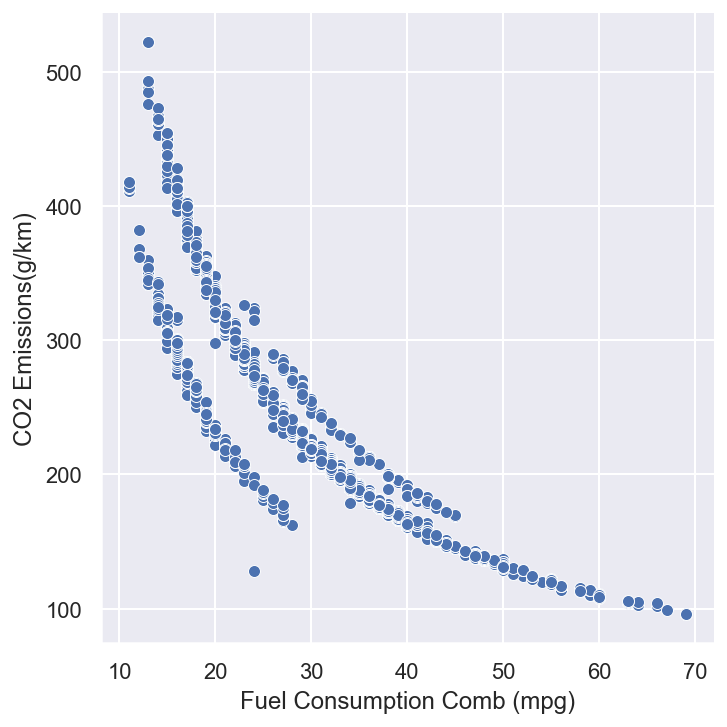

In [44]:
num_data = data.select_dtypes(include=['float64', 'int64'])
num_data = num_data.drop('CO2 Emissions(g/km)', axis=1)
col = num_data.columns
n_un = num_data.nunique()

for id, feature in enumerate(col):
    if n_un[id] < 30:
        sns.catplot(x=feature, y='CO2 Emissions(g/km)', data=data)
    else:
        sns.relplot(x=feature, y='CO2 Emissions(g/km)', data=data)

## 두 개로 갈린 부분이 있다

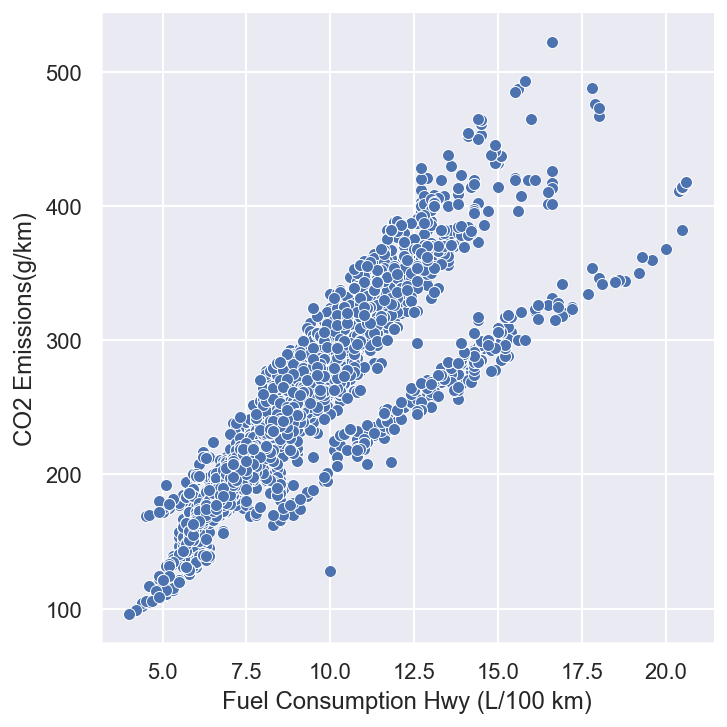

In [48]:
sns.relplot(x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', data=data)